

#### Name:Mohil Patel
-

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pima.csv to Pima.csv


In [ ]:
import pandas as pd

#define the column names
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the CSV file into a DataFrame with the specified column names
df = pd.read_csv('Pima.csv', names=column_names)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# minimum value for each column
min_values = df.min()

#maximum value for each column
max_values = df.max()

#average value for each column
avg_values = df.mean()


print('Minimum values:')
print(min_values)
print() # for space betweeen min and max values


print('Maximum values:')
print(max_values)
print()
print('Average values:')
print(avg_values)

Minimum values:
Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Maximum values:
Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

Average values:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age              

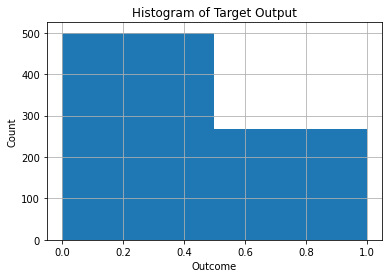

In [ ]:
import matplotlib.pyplot as plt
df['Outcome'].hist(bins=2) # put two bins to make it look clear and not seperated

# Set the plot title and axis labels
plt.title('Histogram of Target Output')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Display the plot
plt.show()

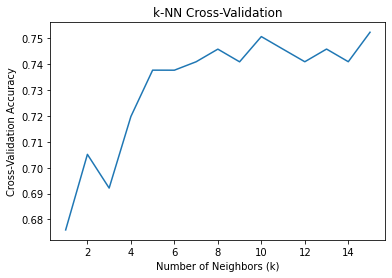

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


#separating the features and target variablee
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Range of values for k to test
k_range = range(1, 16)

# Initialize a list to store the cross-validation scores for each value of k
cv_scores = []

# Use 5-fold cross-validation to evaluate k-NN with each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the results
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Cross-Validation')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
#train  new k-NN model with the optimal k value
k_optimal = 5
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train, y_train)

# Use the trained model to predict the class labels of the test data
y_pred = knn.predict(X_test)

#calculating the test error as the inverse of the accuracy
test_error = 1 - accuracy_score(y_test, y_pred)
print("Test Error: {:.2f}%".format(test_error * 100))

Test Error: 26.62%


In [ ]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

#transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# knn classifier object with the optimal k value
knn = KNeighborsClassifier(n_neighbors=5)

# Compute the cross-validation score using the preprocessed training data
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

# mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean cross-validation score: {mean_cv_score:.3f}, Standard deviation: {std_cv_score:.3f}")

# Fit the KNN model on the preprocessed training data
knn.fit(X_train_scaled, y_train)

# accuracy on the test data
test_accuracy = knn.score(X_test_scaled, y_test)

print(f"Test accuracy: {test_accuracy:.3f}")

Mean cross-validation score: 0.739, Standard deviation: 0.031
Test accuracy: 0.740
